In [11]:
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp
import pandas
from urllib.request import urlretrieve
from matplotlib import pyplot as plt

erros = [] 

# Carregando arquivo CSV
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

# Converte a coluna da string em flot
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Converte a coluna da string em inteiro
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Encontre os valores mínimo e máximo para cada coluna
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats
 
# Redimensionar colunas do conjunto de dados para o intervalo 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		erros.append(sum_error/100)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
 
# Test training backprop algorithm
'''seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]'''
seed(1)
# load and prepare data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv'
urlretrieve(url, 'seeds_dataset.csv')
filename = 'seeds_dataset.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.5, 150, n_outputs)
for layer in network:
	print(layer)


>epoch=0, lrate=0.500, error=65.282
>epoch=1, lrate=0.500, error=80.990
>epoch=2, lrate=0.500, error=80.814
>epoch=3, lrate=0.500, error=80.295
>epoch=4, lrate=0.500, error=79.471
>epoch=5, lrate=0.500, error=77.621
>epoch=6, lrate=0.500, error=73.783
>epoch=7, lrate=0.500, error=68.429
>epoch=8, lrate=0.500, error=63.524
>epoch=9, lrate=0.500, error=60.337
>epoch=10, lrate=0.500, error=58.853
>epoch=11, lrate=0.500, error=58.527
>epoch=12, lrate=0.500, error=58.862
>epoch=13, lrate=0.500, error=59.517
>epoch=14, lrate=0.500, error=60.117
>epoch=15, lrate=0.500, error=59.790
>epoch=16, lrate=0.500, error=57.484
>epoch=17, lrate=0.500, error=52.737
>epoch=18, lrate=0.500, error=46.365
>epoch=19, lrate=0.500, error=39.813
>epoch=20, lrate=0.500, error=34.013
>epoch=21, lrate=0.500, error=29.303
>epoch=22, lrate=0.500, error=25.672
>epoch=23, lrate=0.500, error=22.948
>epoch=24, lrate=0.500, error=20.931
>epoch=25, lrate=0.500, error=19.442
>epoch=26, lrate=0.500, error=18.345
>epoch=27, 

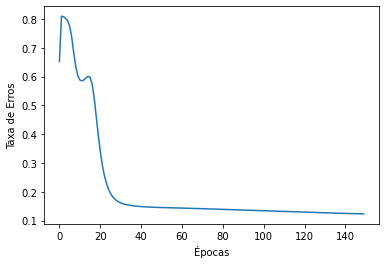

In [12]:
epocas = range(0,150)
plt.plot(epocas, erros)
plt.ylabel('Taxa de Erros')
plt.xlabel('Épocas')
plt.show()

In [16]:
# Backprop no conjunto de dados de sementes de trigo
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp
import pandas
from urllib.request import urlretrieve
from matplotlib import pyplot as plt
erros = []
esperado = []
obtido = [] 
pesos = []
# Carregando arquivo CSV
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Converte a coluna da string em flot
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Converte a coluna da string em inteiro
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Encontre os valores mínimo e máximo para cada coluna
def dataset_minmax(dataset):
	minmax = list()
	stats = [[min(column), max(column)] for column in zip(*dataset)]
	return stats
 
# Redimensionar colunas do conjunto de dados para o intervalo 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)-1):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Divide um conjunto de dados em k dobras
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calcula a porcentagem de acurácia
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Avalia um algoritmo usando uma divisão de validação cruzada
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Calcula a ativação do neurônio para uma entrada
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation
 
# Ativação do neurônio de transferência
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))
 
# Propagar para frente a entrada para uma saída de rede
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs
 
# Calcule a derivada de uma saída de neurônio
def transfer_derivative(output):
	return output * (1.0 - output)
 
# Erro de retropropagação e armazenamento em neurônios
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
				erros.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(expected[j] - neuron['output'])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
		
 
# Atualizar pesos de rede com erro
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] += l_rate * neuron['delta']
 
# Treine uma rede por um número fixo de épocas
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
 
# Inicializando a rede
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	pesos.append(network)
	return network
 
# Fazendo uma previsão com uma rede
def predict(network, row):
	outputs = forward_propagate(network, row)
	return outputs.index(max(outputs))
 
# Algoritmo Backpropagation com descida gradiente estocástico
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
	n_inputs = len(train[0]) - 1
	n_outputs = len(set([row[-1] for row in train]))
	network = initialize_network(n_inputs, n_hidden, n_outputs)
	train_network(network, train, l_rate, n_epoch, n_outputs)
	predictions = list()
	for row in test:
		prediction = predict(network, row)
		predictions.append(prediction//1)
		obtido.append(predictions[-1]//2)
		esperado.append(row)
	return(predictions)
	
	
 
# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv'
urlretrieve(url, 'seeds_dataset.csv')
filename = 'seeds_dataset.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.3
n_epoch = 500
n_hidden = 5
scores = evaluate_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)
print('Scores: %s' % scores)
print('Acurácia: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [95.23809523809523, 92.85714285714286, 97.61904761904762, 92.85714285714286, 90.47619047619048]
Acurácia: 93.810%


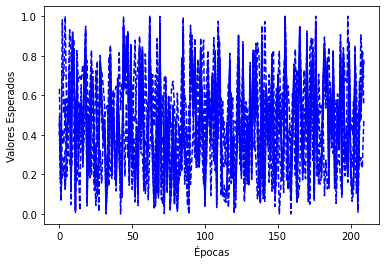

In [11]:
ep = range(0,len(esperado))
plt.plot(ep, esperado, 'b--')
plt.ylabel('Valores Esperados')
plt.xlabel('Épocas')
plt.show()


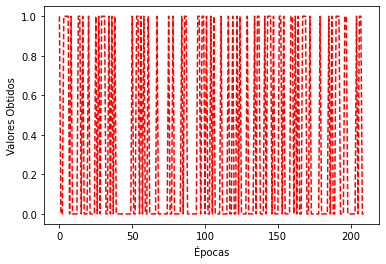

In [12]:
plt.plot(ep, obtido, 'r--')
plt.ylabel('Valores Obtidos')
plt.xlabel('Épocas')
plt.show()